# Exercise - Multiple Linear Regression



It's time for you to apply your knowledge to a new dataset. So that not too much changes come at once, we will stick to the cars topic and work with the **car seats data**. A company that makes car seats would like to construct a model to predict sales and they need your help!

You will find the file called `carseats.csv` in the data folder. It contains 400 observations on the following 11 variables:
* **Sales**:         Unit sales (in thousands) at each location
* **CompPrice**:     Price charged by competitor at each location
* **Income**:        Community income level (in thousands of dollars)
* **Advertising**:   Local advertising budget for company at each location (in thousands of dollars)
* **Population**:    Population size in region (in thousands)
* **Price**:         Price company charges for car seats at each site
* **ShelveLoc**:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* **Age**:           Average age of the local population
* **Education**:     Education level at each location
* **Urban**:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* **US**:            A factor with levels No and Yes to indicate whether the store is in the US or not

**(a) Load the data**

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [14]:
# Import dataset 
df_carseats = pd.read_csv("data/carseats.csv")
df_carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

**(b) Visualize the data with the appropriate plots.** 

<br>
<details><summary>
Click here for a hint…
</summary>
Check the documentation for seaborn's pair plots. 
</details>

In [22]:
numeric_cols.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


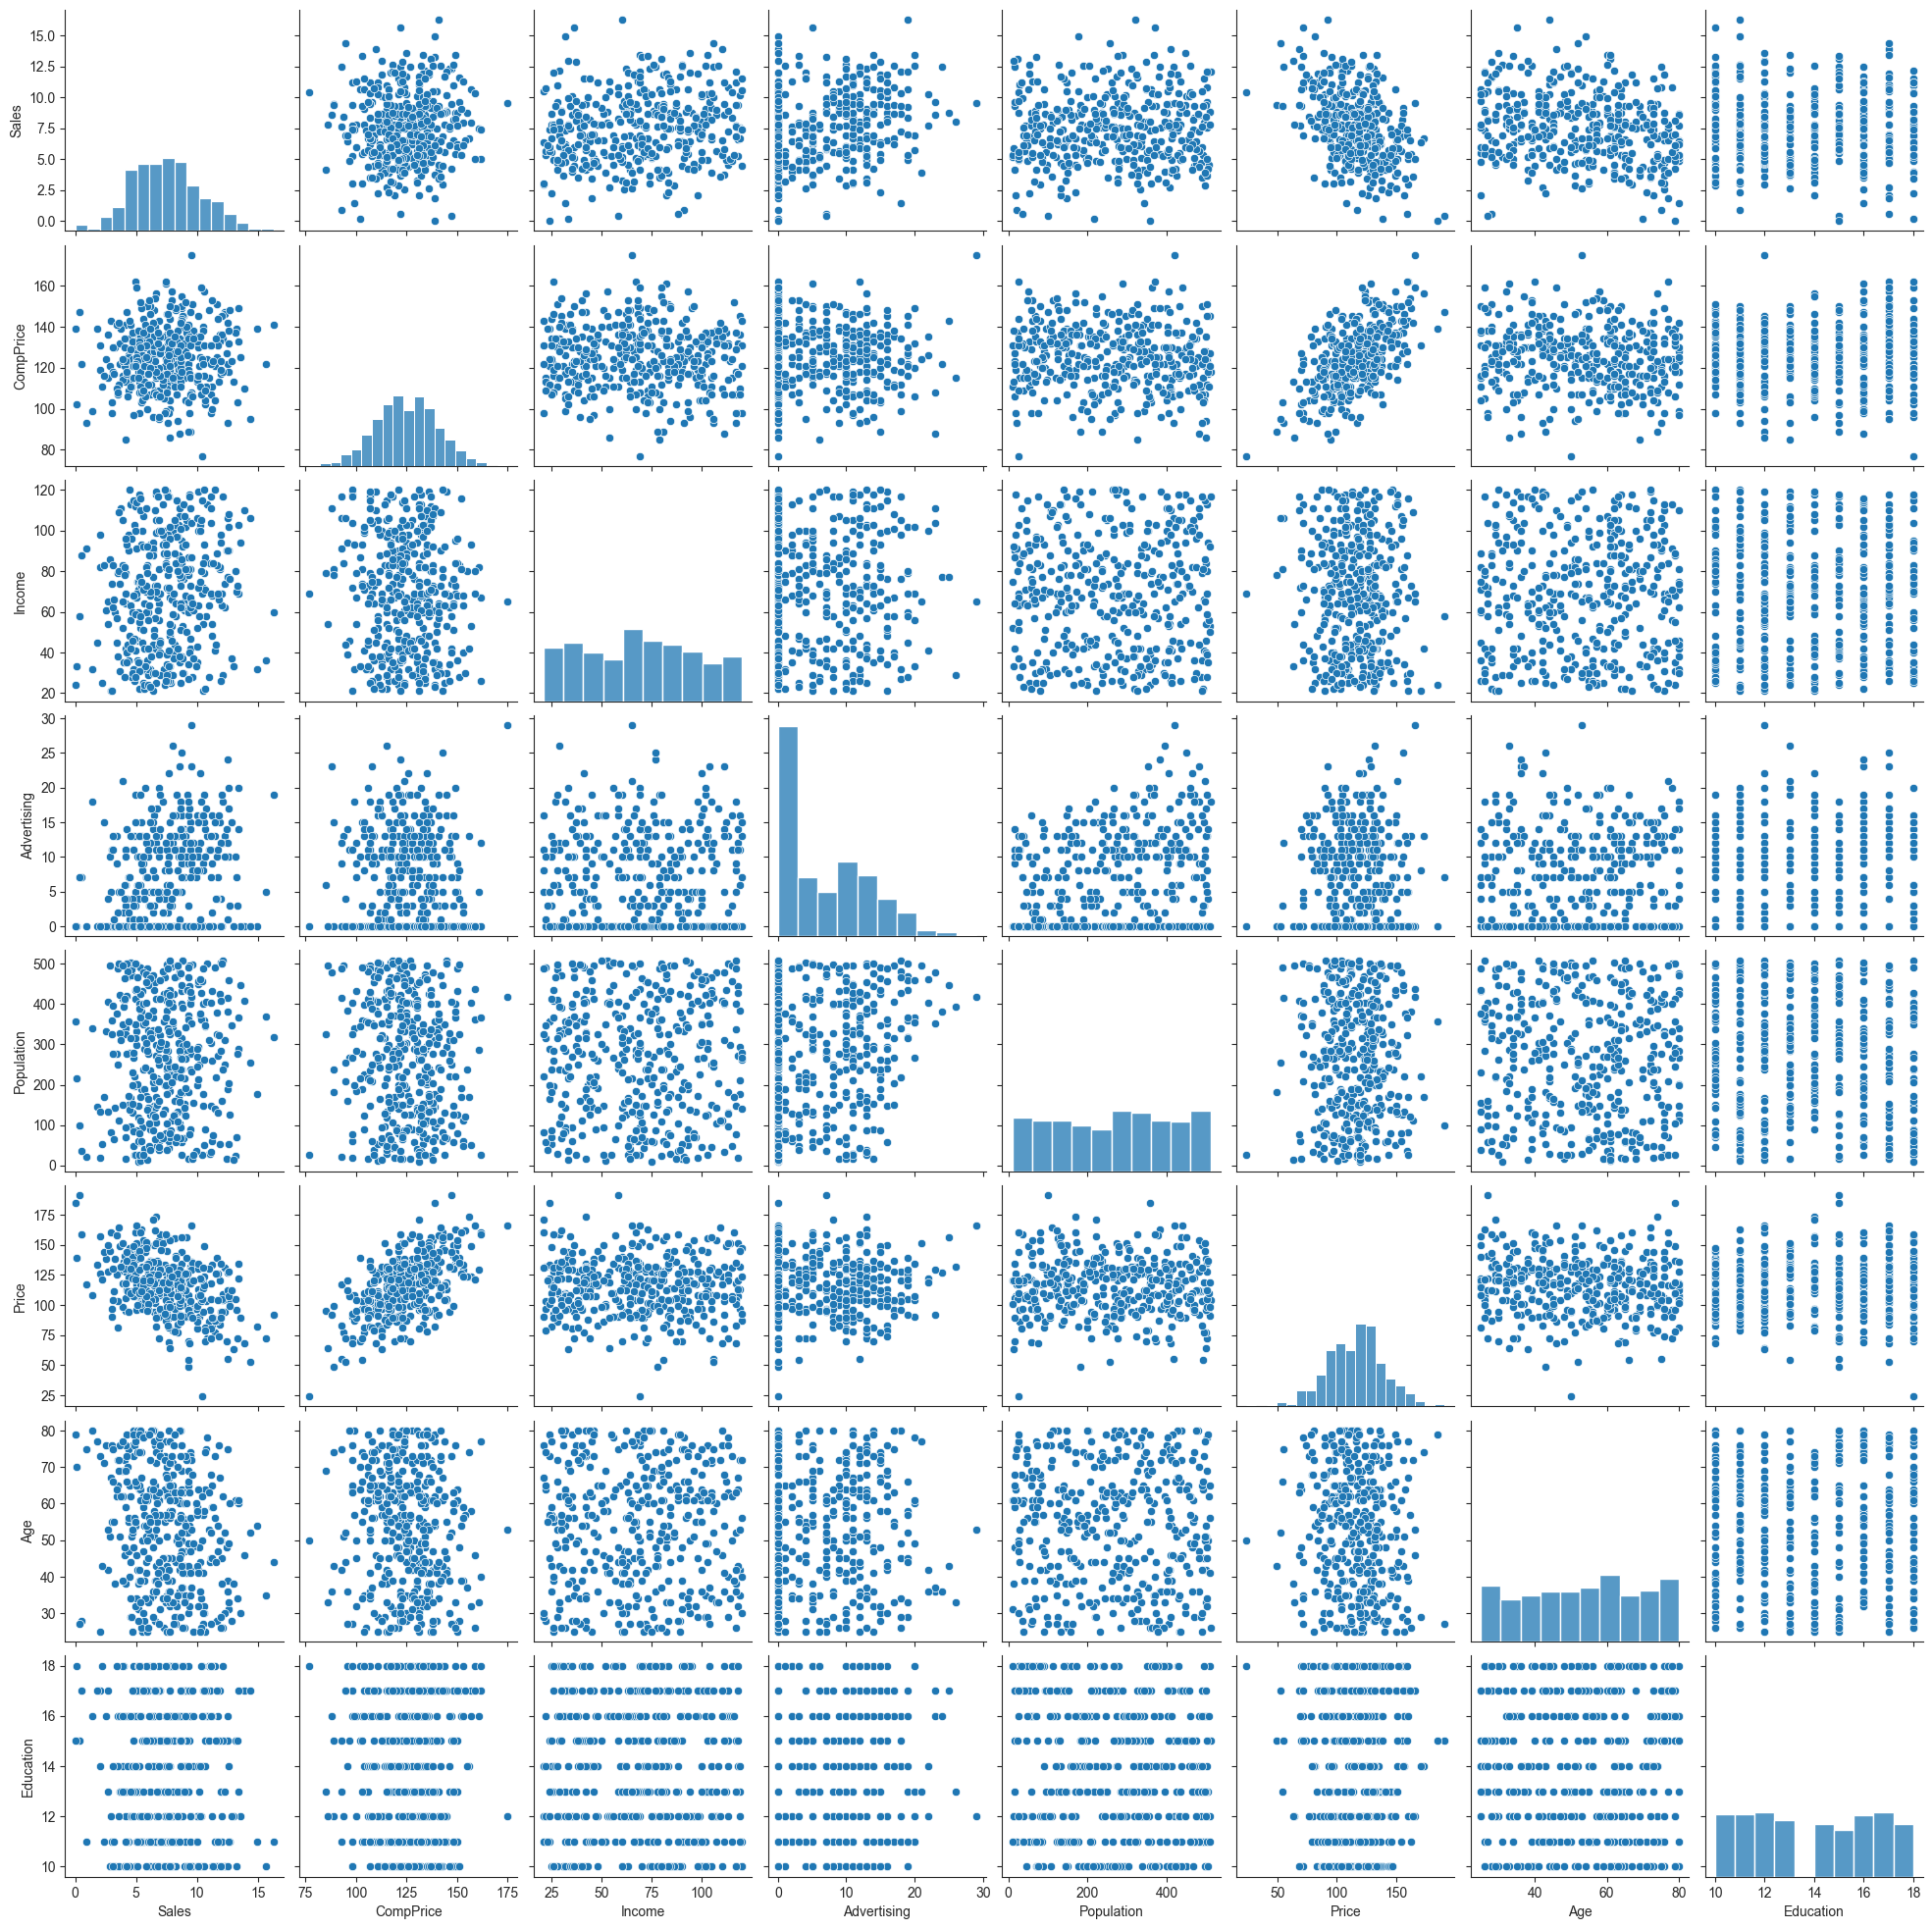

In [7]:
numeric_cols = df_carseats.select_dtypes(include="number")

sns.pairplot(numeric_cols)
plt.show()

**(c) What trends do you see in the data?**

In [ ]:
Really hard to find strong correlations - best bet seems to be the price (negative correlation) so far and advertising money spent (positive correlation) - For some reason the competitors price seems not to have an impact on our Sales

**(d) Find the single best predictor for a simple linear regression.**

<br>
<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [11]:
# Define feature and target variable
X_1 = df_carseats[['CompPrice']]
y = df_carseats['Sales']

# Fit linear regression model
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_1, y)

# Calculate r-squared 
y_hat_1 = lin_reg_1.predict(X_1)
print("R-squared CompPrice:", round(r2_score(y, y_hat_1),3))

# Define feature and target variable
X_2 = df_carseats[['Income']]
y = df_carseats['Sales']

# Fit linear regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_2, y)

# Calculate r-squared 
y_hat_2 = lin_reg_2.predict(X_2)
print("R-squared Income:", round(r2_score(y, y_hat_2),3))

R-squared CompPrice: 0.004
R-squared Income: 0.023


In [13]:
target = "Sales"
features = [
    "CompPrice", "Income", "Advertising", "Population",
    "Price", "Age", "Education"
]

r2_results = {}

for feature in features:
    X = df_carseats[[feature]]
    y = df_carseats[target]

    model = LinearRegression()
    model.fit(X, y)

    y_hat = model.predict(X)
    r2_results[feature] = r2_score(y, y_hat)

# Show results
for k, v in r2_results.items():
    print(f"R-squared {k}: {v:.3f}")

R-squared CompPrice: 0.004
R-squared Income: 0.023
R-squared Advertising: 0.073
R-squared Population: 0.003
R-squared Price: 0.198
R-squared Age: 0.054
R-squared Education: 0.003


**(e) Fit a model with all possible explanatory variables.**

In [67]:
# Define model input X with all possible features
X_all7 = df_carseats[[
                        'CompPrice', 
                        'Income', 
                        'Advertising', 
                        'Population', 
                        'Price',
                        #'ShelveLoc',
                        'Age', 
                        'Education', 
                        #'Urban', 
                        #'US'
                    ]]
y_all7 = df_carseats.Sales

# Fit linear regression model
lin_reg_all = LinearRegression()
lin_reg_all.fit(X_all7, y_all7)

# Calculate intercept and coefficient
intercept = lin_reg_all.intercept_
coefficients = lin_reg_all.coef_
print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

Intercept: 7.7077
Coefficients: [ 9.390e-02  1.290e-02  1.309e-01 -1.000e-04 -9.250e-02 -4.500e-02
 -4.000e-02]


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

X_all7 = df_carseats[
    ['CompPrice', 'Income', 'Advertising', 'Population',
     'Price', 'Age', 'Education']
]
y_all7 = df_carseats['Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all7)

lin_reg_std = LinearRegression()
lin_reg_std.fit(X_scaled, y_all7)

# Standardized coefficients
std_coefficients = pd.Series(
    lin_reg_std.coef_,
    index=X_all7.columns
)

print("Standardized coefficients:")
print(std_coefficients.round(3))

Standardized coefficients:
CompPrice      1.438
Income         0.360
Advertising    0.869
Population    -0.018
Price         -2.188
Age           -0.728
Education     -0.105
dtype: float64


In [69]:
df_carseats.head(15)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


**(f) What's the best model according to $R^2$?**

In [33]:
# Calculate r-squared 
y_hat_all7 = lin_reg_std.predict(X_scaled)
print("R-squared:", round(r2_score(y_all7, y_hat_all7),3))

R-squared: -3.745


In [31]:
r2 = lin_reg_std.score(X_scaled, y_all7)
print("R-squared:", round(r2, 3))

R-squared: -3.745


**(g) Remove a couple of explanatory variables. How does $R^2$ change?**

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

X_5 = df_carseats[
    ['CompPrice',
     'Income',
     'Advertising', 
     #'Population',
     'Price',
     'Age'
     #'Education'
    ]
]
y_5 = df_carseats['Sales']
    

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_5)

lin_reg_std = LinearRegression()
lin_reg_std.fit(X_scaled, y_5)

# Standardized coefficients
std_coefficients = pd.Series(
    lin_reg_std.coef_,
    index=X_5.columns
)

print("Standardized coefficients:")
print(std_coefficients.round(3))

Standardized coefficients:
CompPrice      1.438
Income         0.366
Advertising    0.868
Price         -2.188
Age           -0.728
dtype: float64


In [74]:
r2_5 = lin_reg_std.score(X_scaled, y_5)
print("R-squared:", round(r2_5, 3))

R-squared: 0.54


**(h) Repeat the process for the adjusted $R^2$.**

In [75]:
def adjusted_r_squared(r2, X):
    n = X.shape[0]      # number of observations
    p = X.shape[1]      # number of predictors
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

r2_5 = lin_reg_std.score(X_scaled, y_5)
adj_r2_5 = adjusted_r_squared(r2_5, X_scaled)

print("R-squared:", round(r2_5, 3))
print("Adjusted R-squared:", round(adj_r2_5, 3))

R-squared: 0.54
Adjusted R-squared: 0.534


In [76]:


r2_5 = lin_reg_std.score(X_scaled, y_5)
adj_r2_5 = adjusted_r_squared(r2_5, X_scaled)

print("R-squared:", round(r2_5, 3))
print("Adjusted R-squared:", round(adj_r2_5, 3))

R-squared: 0.54
Adjusted R-squared: 0.534


**(i) What are your most interesting findings?**

In [ ]:
Although competitors price alone did not have a strong correlation with Sales, it seems to be pretty helpful in our model combined with Price and Advertising to explain the variance of data



The model explains about 54% of the variation in Sales.
Adjusted R² being nearly identical means the predictors you included are genuinely contributing, with little wasted complexity.
Strong Predictors (high absolute standardized coefficients)
Advertising (≈ 2.01) → Strong positive effect on Sales.
Age (≈ -2.72) → Strong negative effect; younger communities buy more car seats.
CompPrice (≈ 1.44) → Higher competitor prices increase your sales.
Price (≈ -0.998) → Higher company price reduces sales.
Weak Predictors (low absolute coefficients)
Income (≈ 0.088) → Very small effect.
Education (≈ 0.144) → Weak effect.
Population (≈ -0.168) → Minimal contribution.

The model is moderately effective: it captures key drivers of sales but leaves ~46% unexplained.
The most influential factors are Advertising, Age, CompPrice, and Price.
Variables like Income, Education, and Population don’t add much predictive power and could be removed to simplify the model.

<br>
<br> 
<br>

----